## Description

* Data for all recorded gun violence incidents in the US between January 2013 and March 2018, inclusive.
* Source: https://www.kaggle.com/ericking310/us-gun-violence

## Outline
* Visualize the dataset in the map.
* Visualize distribution of gun violence incidents by zipcode. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from datetime import datetime as dt

from arcgis.gis import GIS
from arcgis.features import SpatialDataFrame
gis = GIS()

## Analysis

In [3]:
gun_violence_path = '../Data/gun_violence.csv'

In [4]:
df = pd.read_csv(gun_violence_path)
print(df.columns)
df.describe()

Index(['incident_id', 'date', 'state', 'city_or_county', 'Street address',
       'n_killed', 'n_injured', 'incident_url', 'latitude', 'longitude',
       'ZipCode'],
      dtype='object')


incident_id     n_killed    n_injured     latitude    longitude  \
count  2.122000e+03  2122.000000  2122.000000  2122.000000  2122.000000   
mean   5.153361e+05     0.365221     0.611216    25.917213   -80.230974   
std    2.898830e+05     0.685250     1.016658     0.182472     0.081348   
min    9.247900e+04     0.000000     0.000000    25.434600   -80.632700   
25%    2.605518e+05     0.000000     0.000000    25.796800   -80.262350   
50%    4.956780e+05     0.000000     0.000000    25.888750   -80.219000   
75%    7.669350e+05     1.000000     1.000000    26.069800   -80.180100   
max    1.082498e+06    17.000000    17.000000    26.350200   -80.079900   

            ZipCode  
count   2122.000000  
mean   33138.959472  
std       99.787380  
min    33004.000000  
25%    33055.000000  
50%    33142.000000  
75%    33169.000000  
max    33442.000000

In [5]:
df = pd.DataFrame.spatial.from_xy(df, 'longitude' , 'latitude')

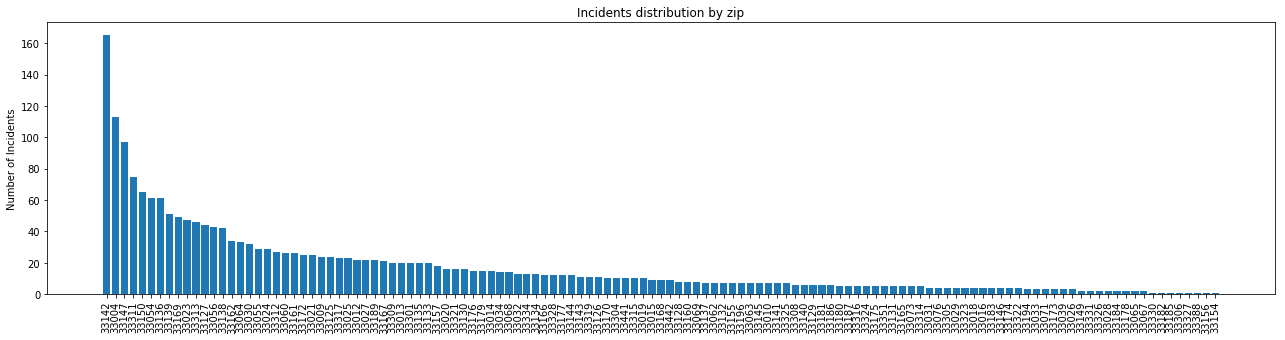

In [6]:
# Plot distribution of numeric attributes

incident_count_by_zip = df['ZipCode'].value_counts()

zips = incident_count_by_zip.index
count = incident_count_by_zip.values

y_pos = np.arange(len(zips))

fig, ax = plt.subplots(figsize=(22,5))
plt.bar(y_pos, count, align='center')
plt.xticks(y_pos, zips, rotation='vertical')
plt.ylabel('Number of Incidents')
plt.title('Incidents distribution by zip')

fig.show()

### Map all incidents

In [7]:
all_map = gis.map('Miami, FL')
all_map.basemap='gray'
all_map

MapView(layout=Layout(height='400px', width='100%'))

In [9]:
df.spatial.plot(map_widget=all_map,
                alpha=0.8,
                cmap='OrRd_r',
                outline_color=[0,0,0,0])

True